In [8]:
from IPython.core.interactiveshell import InteractiveShell
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import pandas as pd
import numpy as np

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
matplotlib.rcParams.update({'font.size': 15})

In [41]:
%matplotlib notebook

## Load Data

Data from Looker:  
https://attuneinsurance.slack.com/archives/DPGUPCG2U/p1597244832004300

In [129]:
df = pd.read_csv('../data/rewards_producers.csv', index_col=0,
                 names=['producer_code', 'quotes', 'binds'], skiprows=1)

### Create mean-scaled column

In [18]:
def pair(series):
    a = series[::2]
    b = series[1::2]
    if a.size>b.size:
        return a, b, a.values[:-1]-b.values
    elif b.size<a.size:
        return a, b, a.values-b.values[:-1]
    return a, b, a.values-b.values

def shuffle(a,b,diff):
    for i,d in enumerate(diff):
        #if you find a producer in a that should move to b
        ind_min = abs(a-d).argmin()
        diff_min = abs(a-d).min()<=5
        if diff_min:
            switch_ind = a.index[ind_min] #producer index
            new_a = a.drop(switch_ind)
            old_b_ind = b.index[i]
            new_b_ind = ','.join([old_b_ind, switch_ind])
            new_b_val = b[old_b_ind] + a[switch_ind]
            new_b = b.drop(old_b_ind)
            new_b[new_b_ind] = new_b_val
            return new_a, new_b, new_a.append(new_b).sort_values(ascending=False)
    else:
        print('No suitable element swap found')
        return a.append(b).sort_values(ascending=False)

def get_topn(array, topn=20):
    return np.sort(array)[::-1][:topn]

In [114]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
scaler = MaxAbsScaler()
df = df.join(pd.DataFrame(scaler.fit_transform(df), index=df.index).sum(axis=1).rename('mean_scaled'))

In [160]:
a,b,diff = pair(df['binds'].sort_values(ascending=False))

In [147]:
c,d,_ = pair(df['quotes'].sort_values(ascending=False))

In [163]:
len(set(b.index).difference(d.index))

760

### Manual sample of top producers

In [316]:
a,b,diff = pair(df['mean_scaled'].sort_values(ascending=False))

In [317]:
get_topn(diff, 100)

array([0.32609892, 0.2890466 , 0.22586235, 0.11822633, 0.04502943,
       0.02599439, 0.01928261, 0.01611927, 0.01534907, 0.01229576,
       0.00976509, 0.00913242, 0.00786708, 0.00786708, 0.00748198,
       0.00583155, 0.00456621, 0.00456621, 0.00418111, 0.00368598,
       0.00266821, 0.00266821, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00203554,
       0.001898  , 0.001898  , 0.00165044, 0.00165044, 0.00165044,
       0.00165044, 0.00165044, 0.00165044, 0.00165044, 0.00165044,
       0.00165044, 0.00165044, 0.00165044, 0.00165044, 0.00165044,
       0.00165044, 0.00140287, 0.00126534, 0.00126534, 0.00126534,
       0.00126534, 0.00126534, 0.00126534, 0.00126534, 0.00126534,
       0.00126534, 0.00101777, 0.00101777, 0.00101777, 0.00101777,
       0.00101777, 0.00101777, 0.00101777, 0.00101777, 0.00101777,
       0.00101777, 0.00101777, 0.00101777, 0.00101777, 0.00088023,
       0.00063267, 0.00063267, 0.00063267, 0.00063267, 0.00063

In [330]:
a,b,diff = pair(df['mean_scaled'].sort_values(ascending=False).head(220))
while any(diff>.0008): 
    shuffled = shuffle(a,b,diff)
    if isinstance(shuffled, tuple):
        a,b,diff = pair(shuffled[2])
        print('Shuffled')
    else:
        break

Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
Shuffled
S

In [331]:
df[df.index.isin(a.index[0].split(','))].iloc[:,:-1].sum()#.sum()
df[df.index.isin(b.index[0].split(','))].iloc[:,:-1].sum()#.sum()

quotes    3632
binds     1121
dtype: int64

quotes    3606
binds     1110
dtype: int64

In [332]:
df[df.index.isin(a.index[0].split(','))].sort_values('quotes',ascending=False)

quotes  binds  mean_scaled
producer_code                             
BTIS00001          438     83     2.000000
MORSTAN00001       294     77     1.598944
SLBINS00001        246     44     1.091764
SIU00001           155     21     0.606893
LONDONUW00001       98     19     0.452660
...                ...    ...          ...
SIAICRL00001         8      6     0.090554
FOLKS00001           8      6     0.090554
IWAAIRMAN00001       8      6     0.090554
JHCINS00001          7      6     0.088271
TEXCAS00001          6      6     0.085988

[109 rows x 3 columns]

In [333]:
df[df.index.isin(b.index[0].split(','))].sort_values('quotes',ascending=False)

quotes  binds  mean_scaled
producer_code                              
JOHN00001           311     80     1.673901
CMFRST00001         236     64     1.309897
TWFGD00001          152     52     0.973538
FDASERV00001        122     46     0.832756
SCOTT00001          115     26     0.575810
...                 ...    ...          ...
NEWERNSCHI00001       9      7     0.104885
PANAMAA00001          9      6     0.092837
SIMAGAPE00001         8      6     0.090554
PACKERAN00001         8      6     0.090554
THFG00001             6      6     0.085988

[111 rows x 3 columns]

In [334]:
control_top = a.index[0].split(',')
treatment_top = b.index[0].split(',')

### Sample Bulk

In [336]:
all_codes = set(df.index)
all_codes.difference_update(control_top)
all_codes.difference_update(treatment_top)

bulk = pd.Series(list(all_codes))

treatment = bulk.sample(frac=.50, random_state=66).values
control = bulk[~bulk.isin(treatment)].values

df[df.index.isin(treatment)].iloc[:,:-1].sum()#.sum()
df[df.index.isin(control)].iloc[:,:-1].sum()#.sum()

### Combine

In [345]:
final_treatment = np.append(treatment, treatment_top)
final_control = np.append(control, control_top)

df[df.index.isin(final_treatment)].iloc[:,:-1].sum()#.sum()
df[df.index.isin(final_control)].iloc[:,:-1].sum()#.sum()

2020-08-13 20:01:04 

In [355]:
final_control.tofile('control_producer_codes_AB_rewards.txt', sep="\n")
final_treatment.tofile('treatment_producer_codes_AB_rewards.txt', sep="\n")

### Track Opt-In Rates for Test Groups

#### Define "active" user

Query for test group user logins during experiment

```
with treatment as (
    select
        unnest(array[LONG_PC_LIST])
            as producer_code)

   , control as (
    select
        unnest(array[LONG_PC_LIST])
            as producer_code

)

select
    date_trunc('day', event_time::timestamp) as day_log_in
     , case when producer_code in (select * from treatment)
                then 'treatment'
            when producer_code in (select * from control)
                then 'control' end as test_group
     , count(distinct user_id)
from ui_events_v2_skinny
where producer_code in (
    (select * from treatment) union (select * from control)
)
  and event_time > '2020-04-01'::timestamp
group by 1, 2;
```

In [290]:
udf = pd.read_csv('../data/rewards_ab_active_users.csv')

In [291]:
udf = udf\
    .pivot(index='day_log_in', columns='test_group', values='count')\
    .reset_index().set_index('day_log_in')
udf.head()

test_group                  control  treatment
day_log_in                                    
2020-04-01 00:00:00.000000      349        352
2020-04-02 00:00:00.000000      344        318
2020-04-03 00:00:00.000000      333        265
2020-04-04 00:00:00.000000       40         37
2020-04-05 00:00:00.000000       21         14

Deprecated

In [221]:
udf = pd.read_csv('../data/rewards_ab_active_users.csv')

In [231]:
udf = udf.set_index('user_id')

In [244]:
udf.count()

may     9062
june    9062
july    9062
aug     9062
dtype: int64

In [270]:
counts = {}
for thresh in range(6):
    for col_ind in range(4):
        key = (thresh, 4-col_ind)
        counts.update(
            {key: (udf[udf > thresh].iloc[:, col_ind:].fillna(
                0).sum(axis=1) == 0).value_counts()[False]}
        )

In [273]:
counts

{(0, 4): 6467,
 (0, 3): 6132,
 (0, 2): 5428,
 (0, 1): 4216,
 (1, 4): 5225,
 (1, 3): 4968,
 (1, 2): 4298,
 (1, 1): 3145,
 (2, 4): 4412,
 (2, 3): 4172,
 (2, 2): 3551,
 (2, 1): 2512,
 (3, 4): 3794,
 (3, 3): 3566,
 (3, 2): 3004,
 (3, 1): 2078,
 (4, 4): 3284,
 (4, 3): 3083,
 (4, 2): 2566,
 (4, 1): 1713,
 (5, 4): 2900,
 (5, 3): 2703,
 (5, 2): 2232,
 (5, 1): 1463}

Count number of producers per test group

In [27]:
! wc -l control_producer_codes_AB_rewards.txt
! wc -l treatment_producer_codes_AB_rewards.txt

    1519 control_producer_codes_AB_rewards.txt
    1522 treatment_producer_codes_AB_rewards.txt


#### Get user activation and rewards opt-in timeseries data from DW

Get okta users over time

```
with treatment as (
    select
        unnest(array[LONG_PC_LIST])
            as producer_code)

   , control as (
    select
        unnest(array[LONG_PC_LIST])
            as producer_code

)
   , counts as (
    select
        date_trunc('day', activated::timestamp) as day_activated
         , case when producer_code in (select producer_code from treatment)
                then 'treatment'
            when producer_code in (select producer_code from control)
                then 'control' end as test_group
         , count(distinct email) as num_users
    from okta_users
    group by 1,2
    order by 1 asc
)

select
    *
from (
         select
             day_activated
              , test_group
              , sum(num_users) over win as num_okta_users
         from counts
         where test_group is not null
             window win as (partition by test_group order by day_activated asc)
         order by 1 asc) a
where day_activated > '2020-08-23'::timestamp;
```

Get opt-ins

```
with treatment as (
    select
        unnest(array[LONG_PC_LIST])
            as producer_code)

   , control as (
    select
        unnest(array[LONG_PC_LIST])
            as producer_code

)
 select
    date_trunc('day', event_time) as day
     , count(distinct user_id) filter (
    where producer_code in (select producer_code from treatment)
    ) as n_optins_treatment
     , count(distinct user_id) filter (
    where producer_code in (select producer_code from control)
    ) as n_optins_control
from ui_events_v2_skinny
where input = 'rewards_opt_in'
group by 1
order by 1 asc;
```

In [183]:
odf = pd.read_csv(filepath_or_buffer='../data/rewards_okta_AB.csv',
                parse_dates=['day_activated'])

In [135]:
rdf = pd.read_csv(filepath_or_buffer='../data/rewards_optin_AB.csv',
                parse_dates=['day'])

#### Resample daily (w forward filling) and calc running sum of user counts

In [184]:
odf = odf\
    .pivot(index='day_activated', columns='test_group', values='num_okta_users')\
    .reset_index().set_index('day_activated')\
    .fillna(method='ffill').resample('d').ffill()
odf.head()

In [ ]:
#resample by day, fill with 0
rdf = rdf.set_index('day').asfreq('d').fillna(0)

In [138]:
rdf['n_optins_treatment_cumulative'] = rdf.n_optins_treatment.cumsum()
rdf['n_optins_control_cumulative'] = rdf.n_optins_control.cumsum()
rdf.head()

n_optins_treatment  n_optins_control  \
day                                                
2019-04-17                 1.0               1.0   
2019-04-18                 1.0               2.0   
2019-04-19                 0.0               0.0   
2019-04-20                 0.0               0.0   
2019-04-21                 0.0               0.0   

            n_optins_treatment_cumulative  n_optins_control_cumulative  
day                                                                     
2019-04-17                            1.0                          1.0  
2019-04-18                            2.0                          3.0  
2019-04-19                            2.0                          3.0  
2019-04-20                            2.0                          3.0  
2019-04-21                            2.0                          3.0

#### Merge active user and opt-in counts

In [292]:
merged = udf.merge(rdf, left_index=True, right_index=True, how='left')
merged.head()

control  treatment  n_optins_treatment  n_optins_control  \
day_log_in                                                             
2020-04-01      349        352                 2.0               2.0   
2020-04-02      344        318                 4.0               8.0   
2020-04-03      333        265                 1.0               5.0   
2020-04-04       40         37                 0.0               1.0   
2020-04-05       21         14                 0.0               0.0   

            n_optins_treatment_cumulative  n_optins_control_cumulative  
day_log_in                                                              
2020-04-01                          465.0                        488.0  
2020-04-02                          469.0                        496.0  
2020-04-03                          470.0                        501.0  
2020-04-04                          470.0                        502.0  
2020-04-05                          470.0                        502.0

In [293]:
merged['control_rate'] = merged.n_optins_control/merged.control
merged['treatment_rate'] = merged.n_optins_treatment/merged.treatment

<IPython.core.display.Javascript object>


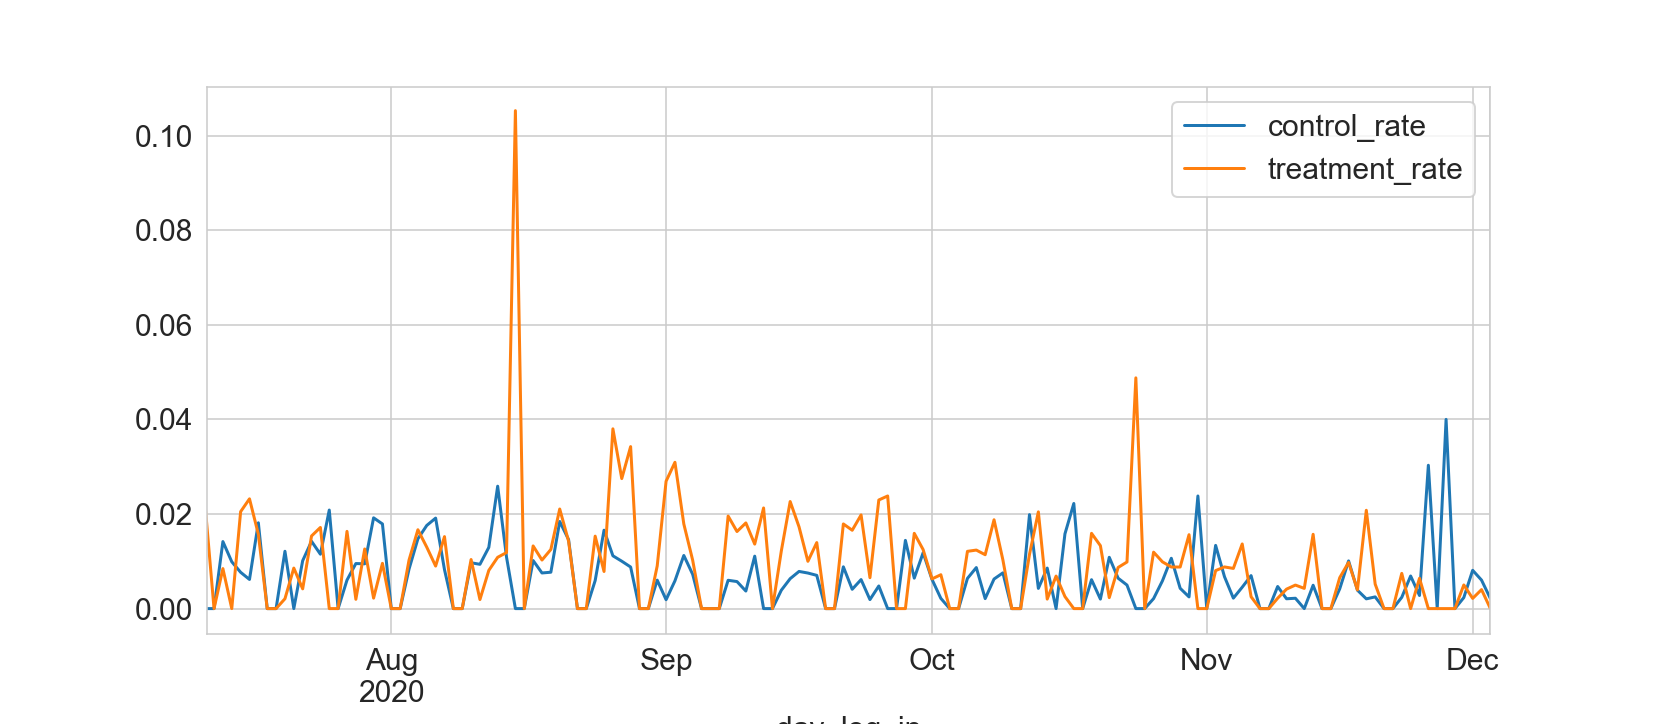

In [295]:
merged[['control_rate','treatment_rate']].dropna().plot()

In [297]:
merged['control_rate_cumulative'] = merged.n_optins_control.cumsum()/merged.control.cumsum()
merged['treatment_rate_cumulative'] = merged.n_optins_treatment.cumsum()/merged.treatment.cumsum()

<IPython.core.display.Javascript object>


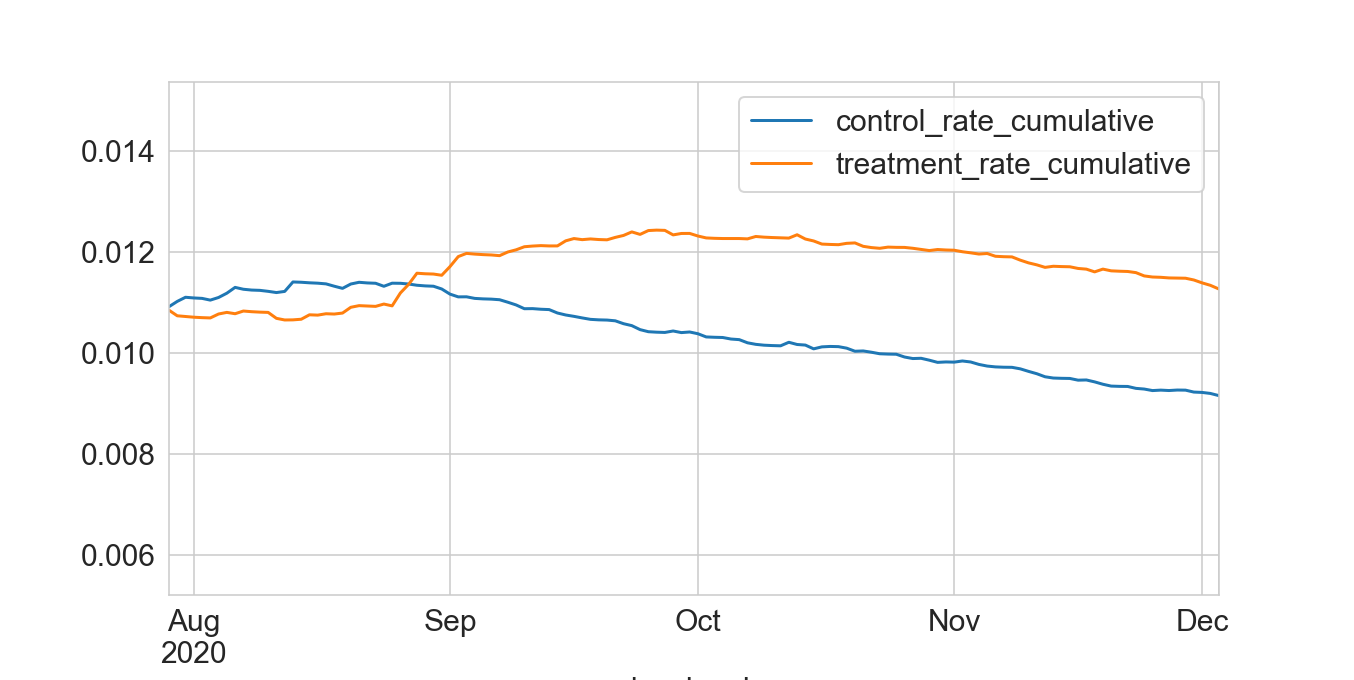

In [299]:
merged[['control_rate_cumulative','treatment_rate_cumulative']].dropna().plot()

In [307]:
merged.control.cumsum()[-1]
merged.treatment.cumsum()[-1]

83685

79912

In [313]:
merged.dropna().tail()

control  treatment  n_optins_treatment  n_optins_control  \
day_log_in                                                             
2020-11-29       19         15                 0.0               0.0   
2020-11-30      429        400                 2.0               1.0   
2020-12-01      494        463                 1.0               4.0   
2020-12-02      498        498                 2.0               3.0   
2020-12-03      471        475                 0.0               1.0   

            n_optins_treatment_cumulative  n_optins_control_cumulative  \
day_log_in                                                               
2020-11-29                         1318.0                       1210.0   
2020-11-30                         1320.0                       1211.0   
2020-12-01                         1321.0                       1215.0   
2020-12-02                         1323.0                       1218.0   
2020-12-03                         1323.0                       1219.0   

            control_rate  treatment_rate  control_rate_cumulative  \
day_log_in                                                          
2020-11-29      0.000000        0.000000                 0.009265   
2020-11-30      0.002331        0.005000                 0.009227   
2020-12-01      0.008097        0.002160                 0.009220   
2020-12-02      0.006024        0.004016                 0.009200   
2020-12-03      0.002123        0.000000                 0.009158   

            treatment_rate_cumulative  
day_log_in                             
2020-11-29                   0.011478  
2020-11-30                   0.011443  
2020-12-01                   0.011386  
2020-12-02                   0.011338  
2020-12-03                   0.011267

In [309]:
import statsmodels.stats.api as st
from ipywidgets import interact

In [310]:
def calc_min_effect_size(control_n=83685, treatment_n=79912):
    '''Assume some alpha and power'''
    ratio = treatment_n/control_n
    return st.tt_ind_solve_power(
        effect_size=None, nobs1=control_n, power=0.9, alpha=0.05,ratio=ratio)

In [311]:
calc_min_effect_size()

0.016032742002824434

In [314]:
def calc_proportion_effectsize(treatment_prop=0.011267, control_prop=0.009158):
    print(f"Treatment/Target Proportion: {treatment_prop}")
    print(f"Control/Starting Proportion: {control_prop}")
    return st.proportion_effectsize(treatment_prop, control_prop)

In [315]:
calc_proportion_effectsize()

Treatment/Target Proportion: 0.011267
Control/Starting Proportion: 0.009158


0.02100471306845908

In [321]:
merged.control.cumsum()[-1]
merged.treatment.cumsum()[-1]
merged.n_optins_control.dropna().cumsum()[-1]
merged.n_optins_treatment.dropna().cumsum()[-1]

83685

79912

733.0

860.0

In [322]:
conversion_data = [733, 860]; obs_data = [83685, 79912]
z_stat, pval = st.proportions_ztest(count=conversion_data, nobs=obs_data)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')

(lower_con, lower_treat), (upper_con, upper_treat) = st.proportion_confint(
    count=conversion_data, nobs=obs_data, alpha=0.05)
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -4.12
p-value: 0.000
ci 95% for control group: [0.008, 0.009]
ci 95% for treatment group: [0.010, 0.011]


#### Merge okta user and opt-in counts

In [279]:
merged = odf.merge(rdf, left_index=True, right_index=True, how='left')
# merged = udf.merge(rdf, left_index=True, right_index=True, how='left')
merged.head()

control  treatment  n_optins_treatment  n_optins_control  \
day_log_in                                                             
2020-08-23       26         25                 0.0               0.0   
2020-08-24      506        457                 7.0               3.0   
2020-08-25      543        510                 4.0               9.0   
2020-08-26      448        421                16.0               5.0   
2020-08-27      499        473                13.0               5.0   

            n_optins_treatment_cumulative  n_optins_control_cumulative  
day_log_in                                                              
2020-08-23                          936.0                       1005.0  
2020-08-24                          943.0                       1008.0  
2020-08-25                          947.0                       1017.0  
2020-08-26                          963.0                       1022.0  
2020-08-27                          976.0                       1027.0

Get daily, net count of okta users that _haven't_ opted in to rewards

In [188]:
merged['control_net'] = merged.control - merged.n_optins_control_cumulative.shift(1)
merged['treatment_net'] = merged.treatment - merged.n_optins_treatment_cumulative.shift(1)

In [189]:
merged.head()

control  treatment  n_optins_treatment  n_optins_control  \
day_activated                                                             
2020-01-02      4343.0        NaN                 0.0               1.0   
2020-01-03      4343.0     3904.0                 0.0               2.0   
2020-01-04      4343.0     3904.0                 0.0               0.0   
2020-01-05      4343.0     3904.0                 0.0               0.0   
2020-01-06      4358.0     3908.0                 2.0               0.0   

               n_optins_treatment_cumulative  n_optins_control_cumulative  \
day_activated                                                               
2020-01-02                             128.0                        130.0   
2020-01-03                             128.0                        132.0   
2020-01-04                             128.0                        132.0   
2020-01-05                             128.0                        132.0   
2020-01-06                             130.0                        132.0   

               control_net  treatment_net  
day_activated                              
2020-01-02             NaN            NaN  
2020-01-03          4213.0         3776.0  
2020-01-04          4211.0         3776.0  
2020-01-05          4211.0         3776.0  
2020-01-06          4226.0         3780.0

In [217]:
merged

control  treatment  n_optins_treatment  n_optins_control  \
day_activated                                                             
2020-01-02      4343.0        NaN                 0.0               1.0   
2020-01-03      4343.0     3904.0                 0.0               2.0   
2020-01-04      4343.0     3904.0                 0.0               0.0   
2020-01-05      4343.0     3904.0                 0.0               0.0   
2020-01-06      4358.0     3908.0                 2.0               0.0   
...                ...        ...                 ...               ...   
2020-11-29      7300.0     6874.0                 0.0               0.0   
2020-11-30      7302.0     6874.0                 2.0               1.0   
2020-12-01      7305.0     6875.0                 1.0               4.0   
2020-12-02      7312.0     6885.0                 2.0               3.0   
2020-12-03      7315.0     6887.0                 0.0               1.0   

               n_optins_treatment_cumulative  n_optins_control_cumulative  \
day_activated                                                               
2020-01-02                             128.0                        130.0   
2020-01-03                             128.0                        132.0   
2020-01-04                             128.0                        132.0   
2020-01-05                             128.0                        132.0   
2020-01-06                             130.0                        132.0   
...                                      ...                          ...   
2020-11-29                            1318.0                       1210.0   
2020-11-30                            1320.0                       1211.0   
2020-12-01                            1321.0                       1215.0   
2020-12-02                            1323.0                       1218.0   
2020-12-03                            1323.0                       1219.0   

               control_net  treatment_net  
day_activated                              
2020-01-02             NaN            NaN  
2020-01-03          4213.0         3776.0  
2020-01-04          4211.0         3776.0  
2020-01-05          4211.0         3776.0  
2020-01-06          4226.0         3780.0  
...                    ...            ...  
2020-11-29          6090.0         5556.0  
2020-11-30          6092.0         5556.0  
2020-12-01          6094.0         5555.0  
2020-12-02          6097.0         5564.0  
2020-12-03          6097.0         5564.0  

[337 rows x 8 columns]

#### Calculate opt-in rates for test groups 

In [195]:
def calc_rates(merged, sample_rate = 'w', start_date = '2020-08-26'):
    n_users = merged.loc[start_date:][['control_net','treatment_net']].resample(sample_rate).last()
    n_optins = merged.loc[start_date:][['n_optins_control','n_optins_treatment']].resample(sample_rate).sum()
    resampled_merge = n_users.merge(n_optins, left_index=True, right_index=True)
    resampled_merge['control_rate'] = resampled_merge.n_optins_control/resampled_merge.control_net
    resampled_merge['treatment_rate'] = resampled_merge.n_optins_treatment/resampled_merge.treatment_net
    return resampled_merge

In [204]:
import seaborn as sns
sns.set_style('whitegrid')

control_rate  treatment_rate
day_activated                              
2020-08-20         0.001672        0.001781
2020-08-21         0.001171        0.001070
2020-08-22         0.000000        0.000000
2020-08-23         0.000000        0.000000
2020-08-24         0.000502        0.001250
2020-08-25         0.001507        0.000715
2020-08-26         0.000838        0.002863
2020-08-27         0.000838        0.002332
2020-08-28         0.000671        0.002696
2020-08-29         0.000000        0.000000
2020-08-30         0.000000        0.000000
2020-08-31         0.000504        0.000720
2020-09-01         0.000168        0.002522

<IPython.core.display.Javascript object>


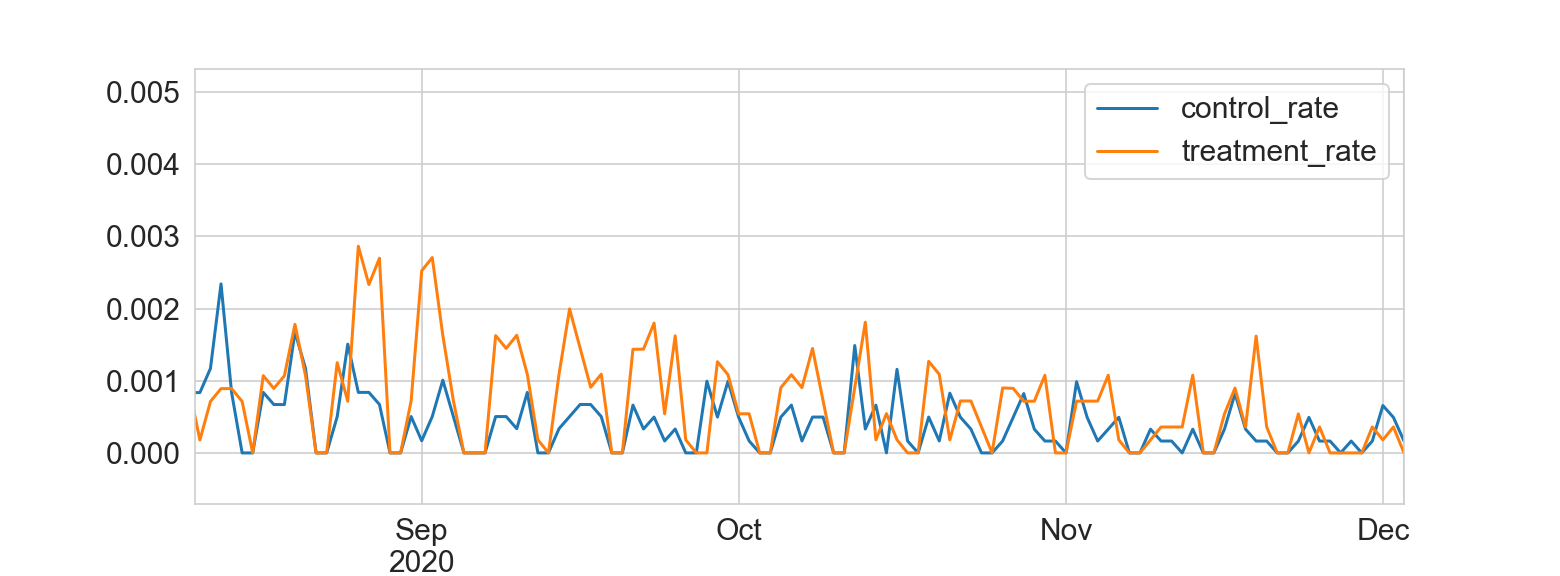

In [205]:
resampled_rates = calc_rates(merged, sample_rate='d', start_date='2020-01-01')
resampled_rates.filter(regex='_rate$').loc['2020-08-20':'2020-09-01']
resampled_rates.filter(regex='_rate$').plot()

control_rate  treatment_rate
day_activated                              
2020-08-02         0.005091        0.003585
2020-08-09         0.006029        0.005700
2020-08-16         0.006037        0.004283
2020-08-23         0.005023        0.005894
2020-08-30         0.004366        0.009913
2020-09-06         0.002690        0.008333
2020-09-13         0.002182        0.005991
2020-09-20         0.002682        0.006553
2020-09-27         0.001987        0.007041
2020-10-04         0.003144        0.003432
2020-10-11         0.002317        0.005071
2020-10-18         0.003809        0.003624
2020-10-25         0.002311        0.004319
2020-11-01         0.002137        0.004303
2020-11-08         0.002468        0.003412
2020-11-15         0.000986        0.002334
2020-11-22         0.001807        0.003782
2020-11-29         0.001149        0.000900
2020-12-06         0.001476        0.000899

<IPython.core.display.Javascript object>


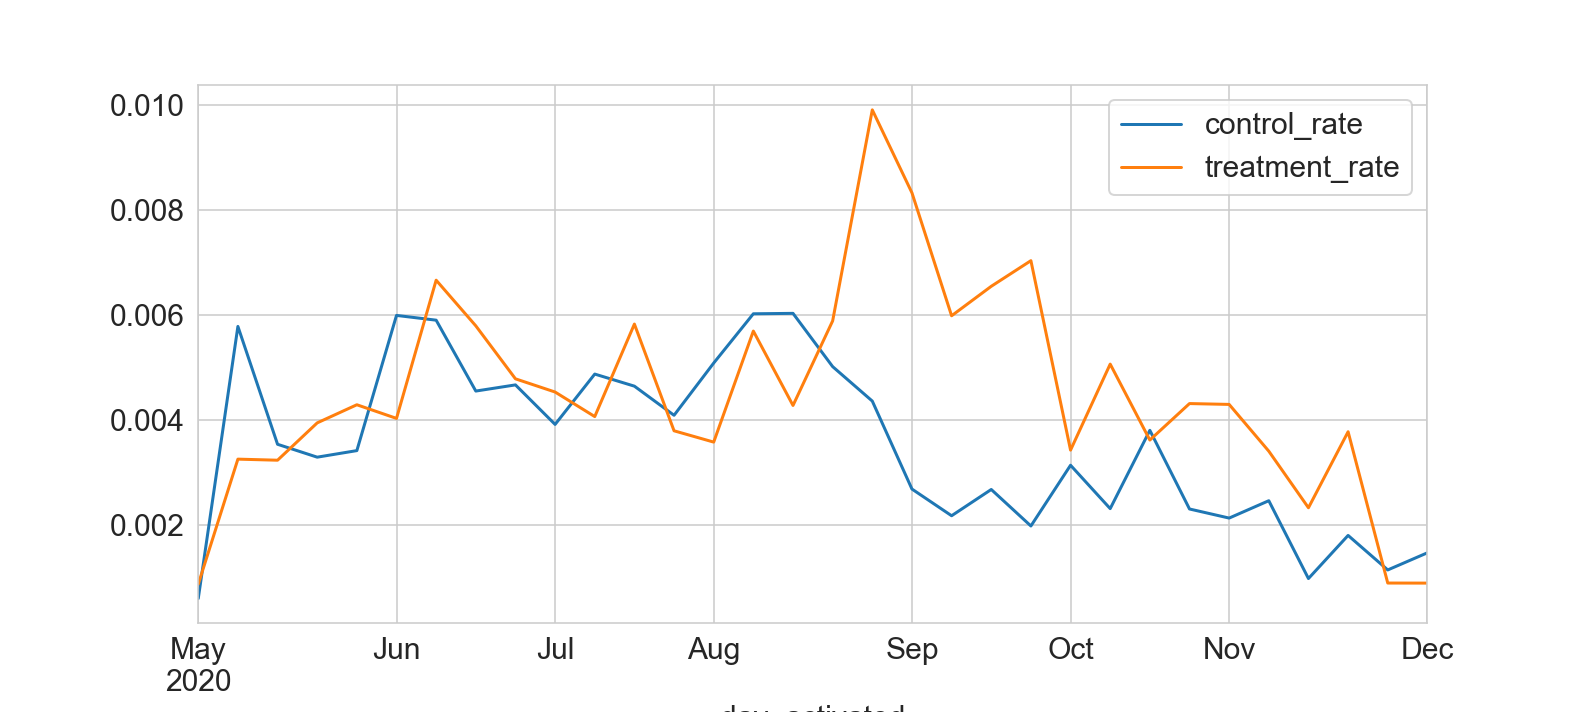

In [216]:
resampled_rates = calc_rates(merged, sample_rate='w', start_date='2020-05-01')
resampled_rates.filter(regex='_rate$').loc['2020-08-01':]
resampled_rates.filter(regex='_rate$').plot()

In [206]:
resampled_rates = calc_rates(merged, sample_rate='d', start_date='2020-08-01')

In [207]:
resampled_rates

control_net  treatment_net  n_optins_control  \
day_activated                                                 
2020-08-01          5893.0         5579.0               0.0   
2020-08-02          5893.0         5579.0               0.0   
2020-08-03          5900.0         5586.0               4.0   
2020-08-04          5922.0         5592.0               8.0   
2020-08-05          5922.0         5591.0               9.0   
...                    ...            ...               ...   
2020-11-29          6090.0         5556.0               0.0   
2020-11-30          6092.0         5556.0               1.0   
2020-12-01          6094.0         5555.0               4.0   
2020-12-02          6097.0         5564.0               3.0   
2020-12-03          6097.0         5564.0               1.0   

               n_optins_treatment  control_rate  treatment_rate  
day_activated                                                    
2020-08-01                    0.0      0.000000        0.000000  
2020-08-02                    0.0      0.000000        0.000000  
2020-08-03                    5.0      0.000678        0.000895  
2020-08-04                    8.0      0.001351        0.001431  
2020-08-05                    7.0      0.001520        0.001252  
...                           ...           ...             ...  
2020-11-29                    0.0      0.000000        0.000000  
2020-11-30                    2.0      0.000164        0.000360  
2020-12-01                    1.0      0.000656        0.000180  
2020-12-02                    2.0      0.000492        0.000359  
2020-12-03                    0.0      0.000164        0.000000  

[125 rows x 6 columns]

In [210]:
daily_cumulative = merged[['control_net', 'treatment_net',
        'n_optins_control_cumulative', 'n_optins_treatment_cumulative']].copy()

In [212]:
daily_cumulative['control_rate'] = daily_cumulative.n_optins_control_cumulative / \
    daily_cumulative.control_net
daily_cumulative['treatment_rate'] = daily_cumulative.n_optins_treatment_cumulative / \
    daily_cumulative.treatment_net

<IPython.core.display.Javascript object>


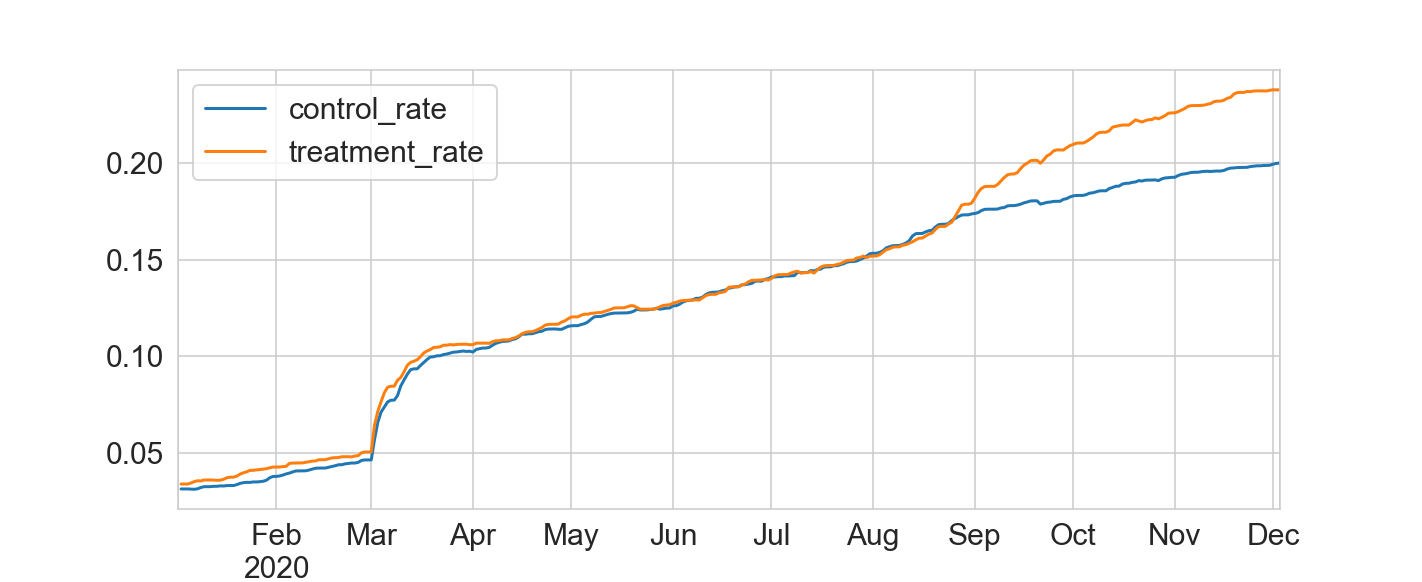

In [215]:
daily_cumulative.filter(regex='_rate$').plot()